In [25]:
import pandas as pd
import numpy as np


In [26]:
df = pd.read_csv("responses.csv")

In [27]:
df.columns = [
    "Timestamp", "Most_Visited_Cafeteria", "Most_Visited_Time", "Visit_Frequency",
    "Most_Visited_Day", "Meal_Type", "Weather", "Gap_Next_Class", "Perceived_Busiest_Time"
]

In [28]:
cafeterias = df["Most_Visited_Cafeteria"].dropna().tolist()

In [29]:
transition_counts = {}
for (curr, next_) in zip(cafeterias[:-1], cafeterias[1:]):
    if curr not in transition_counts:
        transition_counts[curr] = {}
    if next_ not in transition_counts[curr]:
        transition_counts[curr][next_] = 0
    transition_counts[curr][next_] += 1

In [30]:
transition_matrix = {}
for curr, transitions in transition_counts.items():
    total = sum(transitions.values())
    transition_matrix[curr] = {k: v / total for k, v in transitions.items()}

In [31]:
from collections import Counter

cafeteria_counts = Counter(cafeterias)
sorted_cafes = sorted(cafeteria_counts.items(), key=lambda x: x[1], reverse=True)
num_cafes = len(sorted_cafes)

In [32]:
cut1 = num_cafes // 3
cut2 = 2 * cut1

In [33]:
states = ["High", "Medium", "Low"]
emission_matrix = {state: {} for state in states}


In [34]:
for i, (cafe, count) in enumerate(sorted_cafes):
    if i < cut1:
        emission_matrix["High"][cafe] = count
    elif i < cut2:
        emission_matrix["Medium"][cafe] = count
    else:
        emission_matrix["Low"][cafe] = count

In [35]:
for state in emission_matrix:
    total = sum(emission_matrix[state].values())
    emission_matrix[state] = {k: v / total for k, v in emission_matrix[state].items()}

In [36]:
print(transition_matrix)
print(emission_matrix)

{'Techno': {'IC': 0.44, 'Chhotu': 0.2, 'Techno': 0.28, 'Pahaan': 0.08}, 'IC': {'IC': 0.5882352941176471, 'Pahaan': 0.0196078431372549, 'Techno': 0.2549019607843137, 'Chhotu': 0.058823529411764705, 'Sharma': 0.0392156862745098, 'Laxmi': 0.0392156862745098}, 'Pahaan': {'Techno': 0.25, 'IC': 0.75}, 'Chhotu': {'Pahaan': 0.1111111111111111, 'IC': 0.6666666666666666, 'Techno': 0.2222222222222222}, 'Sharma': {'IC': 1.0}, 'Laxmi': {'Chhotu': 0.5, 'Techno': 0.5}}
{'High': {'IC': 0.6753246753246753, 'Techno': 0.3246753246753247}, 'Medium': {'Chhotu': 0.6923076923076923, 'Pahaan': 0.3076923076923077}, 'Low': {'Sharma': 0.5, 'Laxmi': 0.5}}


In [37]:
import random

In [38]:
def predict_next_cafeteria(current_cafe):
    if current_cafe not in transition_matrix:
        return "Unknown"
    next_options = transition_matrix[current_cafe]
    cafes = list(next_options.keys())
    probs = list(next_options.values())
    return np.random.choice(cafes, p=probs)

In [39]:
def get_emission_sample(hidden_state):
    if hidden_state not in emission_matrix:
        return "Unknown"
    cafes = list(emission_matrix[hidden_state].keys())
    probs = list(emission_matrix[hidden_state].values())
    return np.random.choice(cafes, p=probs)

In [40]:
print("Transition prediction from 'IC':", predict_next_cafeteria("IC"))
print("Emission sample from 'High' crowd level:", get_emission_sample("High"))

Transition prediction from 'IC': IC
Emission sample from 'High' crowd level: IC


In [41]:
def forecast_next_state(current_cafe, current_time):
    hour = int(current_time.split(":")[0])
    time_cluster = kmeans.predict([[hour]])[0]
    predicted_crowd = cluster_crowd_map.get(time_cluster, "Unknown")

    if current_cafe in transition_matrix:
        next_cafes = transition_matrix[current_cafe]
        next_cafe = max(next_cafes, key=next_cafes.get)
    else:
        next_cafe = "Unknown"
        
    
    return {
        "Next Likely Cafeteria": next_cafe,
        "Expected Crowd Level": predicted_crowd,
        "Time Cluster": time_cluster
    }

In [46]:
# Apply KMeans clustering with K=4 to identify peak visit times
from sklearn.cluster import KMeans

# Fit KMeans model on visit hours
kmeans = KMeans(n_clusters=4, random_state=42)
df["Visit_Hour"] = pd.to_datetime(df["Most_Visited_Time"], errors='coerce').dt.hour

df = df.dropna(subset=["Visit_Hour"])
df["Visit_Hour"] = df["Visit_Hour"].astype(int)

kmeans.fit(df[["Visit_Hour"]])  # This must be called before forecast_next_state



C:\Users\Rishi\AppData\Local\Temp\ipykernel_5492\1155084655.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Visit_Hour"] = pd.to_datetime(df["Most_Visited_Time"], errors='coerce').dt.hour
C:\Users\Rishi\AppData\Local\Temp\ipykernel_5492\1155084655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Visit_Hour"] = df["Visit_Hour"].astype(int)
d:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

KMeans(n_clusters=4, random_state=42)

In [47]:
cluster_crowd_map = {
    0: "High",
    1: "Medium",
    2: "Low",
    3: "High"
}


In [48]:
print("Transition prediction from 'IC':", predict_next_cafeteria("IC"))
#print("Emission sample from 'High':", get_emission_sample("High"))
print("Forecast from IC at 18:30:", forecast_next_state("IC", "18:30"))

Transition prediction from 'IC': Techno
Forecast from IC at 18:30: {'Next Likely Cafeteria': 'IC', 'Expected Crowd Level': 'High', 'Time Cluster': 3}


d:\Programs\Anaconda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


d:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

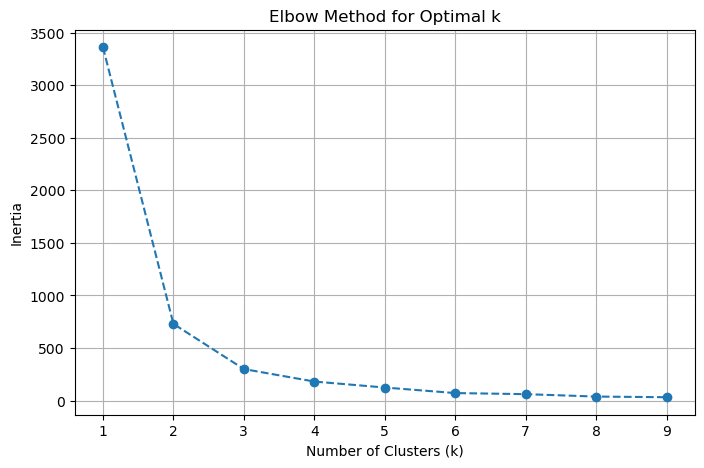

In [49]:
# Add this code before fitting the KMeans model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 10)  # Test k values from 1 to 9
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[["Visit_Hour"]])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()